In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data/australian.dat', sep='\s+', header=None, skiprows=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1


In [4]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [5]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)


In [10]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=14, sigma=1.0, learning_rate=0.5)

In [11]:
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)


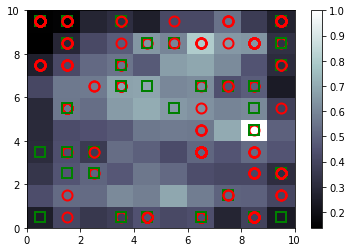

In [13]:
# Visualize the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1] + 0.5,
         markers[Y[i]],
         markeredgecolor = colors[Y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth=2)
    